In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('bigmart_train.csv')
test = pd.read_csv('bigmart_test.csv')
train['source']='train'
test['source']='test'
df = pd.concat([train,test])
copy = df.copy()

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [4]:
train.shape, test.shape, df.shape

((8523, 13), (5681, 12), (14204, 13))

questions to ask?
1. How are the sales related to different attributes?
2. What attributes affect the sales the most?
3. Does the fat content affect the sales? Or is it due to visibility?
4. Does visbility play a role in the sales?
5. Does mrp affect the sales? If yes, then can we determine the income group people coming to buy?
6. In which outlet, the most sales are occuring?
7. What item type do customers prefer the most?
8. Does the outlet size affect the sales? Do the sales depend linearly on the size of the shop?
9. Do established shops have any advantage over newly opened shops?
10. Which outlet type shows the most sales?
11. Does the establishment year and item type have any relation?
12. Does fat content and MRP relate?
13. Does the outlet size/outlet type affect the item type?
14. Does the outlet type and outlet location have any relation?

In [5]:
copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage

In [6]:
copy.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [7]:
copy.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
copy.apply(lambda x: len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
source                           2
dtype: int64

In [9]:
#Filter categorical variables
categorical_columns = [x for x in copy.dtypes.index if copy.dtypes[x]=='object']

#Exclude ID cols and source:
categorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier','Outlet_Identifier', 'Source']]

#Print frequency of categories
for col in categorical_columns:
    print(f'\n\nFrequency of Categories for variable {col}')
    print(copy[col].value_counts())



Frequency of Categories for variable Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64


Frequency of Categories for variable Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64


Frequency of Categories for variable Outlet_Size
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64


Frequency of Categories for variable Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: 

The output gives us following observations:

Item_Fat_Content: Some of ‘Low Fat’ values mis-coded as ‘low fat’ and ‘LF’. Also, some of ‘Regular’ are mentioned as ‘regular’.
Item_Type: Not all categories have substantial numbers. It looks like combining them can give better results.
Outlet_Type: Supermarket Type2 and Type3 can be combined. But we should check if that’s a good idea before doing it.
 

# visualization

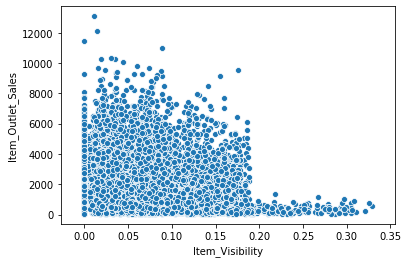

In [10]:
sns.scatterplot(x = 'Item_Visibility', y = 'Item_Outlet_Sales', data=train)

In [11]:
#we cannot see a direct relationship in the above plot

# Data Cleaning

## Imputing missing values

In [12]:
copy.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [13]:
copy['Item_Weight'].fillna(copy['Item_Weight'].mean(), inplace=True)

In [14]:
copy['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [15]:
copy['Outlet_Size'].fillna('Medium', inplace=True)

In [16]:
copy.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [17]:
#we will leave item outlet sales as it is

In [18]:
#removing 0 
copy['Item_Visibility'] = copy['Item_Visibility'].replace([0],[copy['Item_Visibility'].mean()])

In [19]:
copy[copy['Item_Visibility']==0]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source


## Create a broad category of Type of Item

In [20]:
#Get the first two characters of ID:
copy['Item_Type_Combined'] = copy['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
copy['Item_Type_Combined'] = copy['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
copy['Item_Type_Combined'].value_counts()


Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

## Determine the years of operation of a store

In [21]:
#Years:
copy['Outlet_Years'] = 2013 - copy['Outlet_Establishment_Year']
copy['Outlet_Years']

0       14
1        4
2       14
3       15
4       26
        ..
5676    16
5677     4
5678    11
5679     6
5680    11
Name: Outlet_Years, Length: 14204, dtype: int64

## Modify categories of Item_Fat_Content

In [22]:
copy['Item_Fat_Content'] = copy['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular',
                                                             'low fat':'Low Fat'})
print(copy['Item_Fat_Content'].value_counts())

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


In [23]:
copy.loc[copy['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"

In [24]:
copy['Item_Fat_Content']

0          Low Fat
1          Regular
2          Low Fat
3          Regular
4       Non-Edible
           ...    
5676       Regular
5677       Regular
5678    Non-Edible
5679       Regular
5680       Regular
Name: Item_Fat_Content, Length: 14204, dtype: object

In [25]:
copy.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_Combined,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,Food,14
3,FDX07,19.20,Regular,0.065953,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,Food,15
4,NCD19,8.93,Non-Edible,0.065953,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,Non-Consumable,26


## Numerical and One-Hot Coding of Categorical variables

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

copy['Outlet'] = le.fit_transform(copy['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    copy[i] = le.fit_transform(copy[i])  

In [27]:
#One Hot Coding:
copy = pd.get_dummies(copy, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_Combined','Outlet'])

In [28]:
copy.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
source                        object
Outlet_Years                   int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
Outlet_0                       uint8
O

In [29]:
copy = copy.drop(['Item_Identifier', 'Item_Type', 'Outlet_Identifier', 'Outlet_Establishment_Year'], axis=1)

In [30]:
copy.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,source,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_0,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,9.30,0.016047,249.8092,3735.1380,train,14,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,5.92,0.019278,48.2692,443.4228,train,4,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,17.50,0.016760,141.6180,2097.2700,train,14,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,19.20,0.065953,182.0950,732.3800,train,15,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0.065953,53.8614,994.7052,train,26,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [31]:
#Divide into test and train:
train = copy.loc[copy['source']=="train"]
test = copy.loc[copy['source']=="test"]

In [32]:
#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

C:\Users\shiva\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [33]:
train.skew()

Item_Weight               0.098453
Item_Visibility           1.287478
Item_MRP                  0.127202
Item_Outlet_Sales         1.177531
Outlet_Years              0.396641
Item_Fat_Content_0        0.161766
Item_Fat_Content_1        1.600639
Item_Fat_Content_2        0.616705
Outlet_Location_Type_0    0.979119
Outlet_Location_Type_1    0.738834
Outlet_Location_Type_2    0.437995
Outlet_Size_0             2.503964
Outlet_Size_1            -0.453138
Outlet_Size_2             0.979119
Outlet_Type_0             2.239897
Outlet_Type_1            -0.649203
Outlet_Type_2             2.511707
Outlet_Type_3             2.498184
Item_Type_Combined_0      2.788057
Item_Type_Combined_1     -0.972654
Item_Type_Combined_2      1.600639
Outlet_0                  3.525732
Outlet_1                  2.503964
Outlet_2                  2.515596
Outlet_3                  2.511707
Outlet_4                  3.634933
Outlet_5                  2.498184
Outlet_6                  2.507830
Outlet_7            

In [34]:
while train.skew().loc['Item_Visibility']>0.55:
    train['Item_Visibility'] = np.log1p(train['Item_Visibility']) 
    
while train.skew().loc['Item_Outlet_Sales']>0.55:
    train['Item_Outlet_Sales'] = np.log1p(train['Item_Outlet_Sales']) 

C:\Users\shiva\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\shiva\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [35]:
train.skew()

Item_Weight               0.098453
Item_Visibility           0.522154
Item_MRP                  0.127202
Item_Outlet_Sales        -0.882266
Outlet_Years              0.396641
Item_Fat_Content_0        0.161766
Item_Fat_Content_1        1.600639
Item_Fat_Content_2        0.616705
Outlet_Location_Type_0    0.979119
Outlet_Location_Type_1    0.738834
Outlet_Location_Type_2    0.437995
Outlet_Size_0             2.503964
Outlet_Size_1            -0.453138
Outlet_Size_2             0.979119
Outlet_Type_0             2.239897
Outlet_Type_1            -0.649203
Outlet_Type_2             2.511707
Outlet_Type_3             2.498184
Item_Type_Combined_0      2.788057
Item_Type_Combined_1     -0.972654
Item_Type_Combined_2      1.600639
Outlet_0                  3.525732
Outlet_1                  2.503964
Outlet_2                  2.515596
Outlet_3                  2.511707
Outlet_4                  3.634933
Outlet_5                  2.498184
Outlet_6                  2.507830
Outlet_7            

In [36]:
test.skew()

Item_Weight               0.130992
Item_Visibility           1.371746
Item_MRP                  0.136182
Outlet_Years              0.396306
Item_Fat_Content_0        0.183530
Item_Fat_Content_1        1.569785
Item_Fat_Content_2        0.609223
Outlet_Location_Type_0    0.978933
Outlet_Location_Type_1    0.739189
Outlet_Location_Type_2    0.437989
Outlet_Size_0             2.504833
Outlet_Size_1            -0.453136
Outlet_Size_2             0.978933
Outlet_Type_0             2.239791
Outlet_Type_1            -0.648977
Outlet_Type_2             2.513554
Outlet_Type_3             2.496167
Item_Type_Combined_0      2.841087
Item_Type_Combined_1     -0.966346
Item_Type_Combined_2      1.569785
Outlet_0                  3.525661
Outlet_1                  2.504833
Outlet_2                  2.516474
Outlet_3                  2.513554
Outlet_4                  3.634864
Outlet_5                  2.496167
Outlet_6                  2.507734
Outlet_7                  2.510641
Outlet_8            

In [37]:
while test.skew().loc['Item_Visibility']>0.55:
    test['Item_Visibility'] = np.log1p(test['Item_Visibility'])    

C:\Users\shiva\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [38]:
test.skew()

Item_Weight               0.130992
Item_Visibility           0.492041
Item_MRP                  0.136182
Outlet_Years              0.396306
Item_Fat_Content_0        0.183530
Item_Fat_Content_1        1.569785
Item_Fat_Content_2        0.609223
Outlet_Location_Type_0    0.978933
Outlet_Location_Type_1    0.739189
Outlet_Location_Type_2    0.437989
Outlet_Size_0             2.504833
Outlet_Size_1            -0.453136
Outlet_Size_2             0.978933
Outlet_Type_0             2.239791
Outlet_Type_1            -0.648977
Outlet_Type_2             2.513554
Outlet_Type_3             2.496167
Item_Type_Combined_0      2.841087
Item_Type_Combined_1     -0.966346
Item_Type_Combined_2      1.569785
Outlet_0                  3.525661
Outlet_1                  2.504833
Outlet_2                  2.516474
Outlet_3                  2.513554
Outlet_4                  3.634864
Outlet_5                  2.496167
Outlet_6                  2.507734
Outlet_7                  2.510641
Outlet_8            

# modeling data

In [39]:
X = train.drop(['Item_Outlet_Sales'], axis=1)
y = pd.DataFrame(train['Item_Outlet_Sales'])
X_validation = test.copy()

In [40]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [41]:
def maxr2_score(regr, X, y):
    max_r_score = 0
    for i in range(42,102):
        ran=i
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=ran)
        regr.fit(X_train, y_train)
        pred = regr.predict(X_test)
        r2score = r2_score(y_test, pred)
        print(f'r2 score for random state of {ran} is {r2score}')
    
        if r2score>max_r_score:
            max_r_score = r2score
            final_r_state=ran
    print(f'max r2 score for random state of {final_r_state} is {max_r_score}')
    return final_r_state

In [42]:
#checking linear regression model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=80)
lr = LinearRegression()
r_state = maxr2_score(lr,X,y)

r2 score for random state of 42 is 0.7267211139278056
r2 score for random state of 43 is 0.7253500292915909
r2 score for random state of 44 is 0.7283748849486313
r2 score for random state of 45 is 0.7112664902564485
r2 score for random state of 46 is 0.7188771491164758
r2 score for random state of 47 is 0.6925692223472601
r2 score for random state of 48 is 0.7306979437927519
r2 score for random state of 49 is 0.7183158593033427
r2 score for random state of 50 is 0.7229267945920814
r2 score for random state of 51 is 0.7262418977039159
r2 score for random state of 52 is 0.7163307494838788
r2 score for random state of 53 is 0.7195670262276369
r2 score for random state of 54 is 0.7325896179971292
r2 score for random state of 55 is 0.7125232974795731
r2 score for random state of 56 is 0.7153273939559113
r2 score for random state of 57 is 0.7107721927507263
r2 score for random state of 58 is 0.716519184065322
r2 score for random state of 59 is 0.7137026811237809
r2 score for random state of 

In [43]:
cross_val_score(lr, X,y, cv=5, scoring='r2').mean()

0.719000123458894

In [44]:
lr.coef_

array([[-7.05213244e-05, -5.42736896e-02,  8.19586800e-03,
        -1.13005281e-03, -1.16887264e-02,  3.93885219e-03,
         7.74987419e-03, -6.45123139e-02,  5.54819047e-02,
         9.03040921e-03,  2.44721262e-02,  3.56385913e-02,
        -6.01107175e-02, -9.61123963e-01,  3.84964639e-01,
         1.04811179e-01,  4.71348145e-01, -1.55848801e-02,
         1.16460279e-02,  3.93885219e-03, -5.91601041e-01,
         2.44721262e-02,  4.95861763e-03,  1.04811179e-01,
        -3.69522922e-01,  4.71348145e-01,  1.27055366e-01,
        -7.65320794e-02,  1.82356838e-01,  1.22653770e-01]])

In [45]:
#checking k neighbors regressor
neighbors = {'n_neighbors':range(1,30)}
knr = KNeighborsRegressor()
gknr = GridSearchCV(knr, neighbors, cv=10)
gknr.fit(X, y)
gknr.best_params_

{'n_neighbors': 5}

In [46]:
knr = KNeighborsRegressor(n_neighbors=5)
r_state = maxr2_score(knr, X,y)

r2 score for random state of 42 is 0.613825075550398
r2 score for random state of 43 is 0.6006772178504153
r2 score for random state of 44 is 0.6170842031546793
r2 score for random state of 45 is 0.610209951487732
r2 score for random state of 46 is 0.6041200816568935
r2 score for random state of 47 is 0.5803659781542627
r2 score for random state of 48 is 0.6218210780445814
r2 score for random state of 49 is 0.6048424751258289
r2 score for random state of 50 is 0.6057776549056977
r2 score for random state of 51 is 0.5949092011052217
r2 score for random state of 52 is 0.6105514352338359
r2 score for random state of 53 is 0.6037107152015685
r2 score for random state of 54 is 0.618895045578506
r2 score for random state of 55 is 0.6133916030370061
r2 score for random state of 56 is 0.5943109530860193
r2 score for random state of 57 is 0.6022054230548446
r2 score for random state of 58 is 0.6041029441658254
r2 score for random state of 59 is 0.6053070884023486
r2 score for random state of 60

In [47]:
cross_val_score(knr, X,y, cv=5, scoring='r2').mean()

0.6187987257540347

In [48]:
#checking lasso algorithm
lsreg = Lasso()
parameters = {'alpha':[0.001,0.01,0.1,1]}
clf = GridSearchCV(lsreg, parameters, cv=10)
clf.fit(X, y)
clf.best_params_

{'alpha': 0.001}

In [49]:
lsreg = Lasso(alpha=0.1)
r_state = maxr2_score(lsreg, X, y)

r2 score for random state of 42 is 0.6070097898138194
r2 score for random state of 43 is 0.6097632014423489
r2 score for random state of 44 is 0.6096340981318047
r2 score for random state of 45 is 0.5915523750173937
r2 score for random state of 46 is 0.6031990422176258
r2 score for random state of 47 is 0.5916438580923369
r2 score for random state of 48 is 0.59642693055066
r2 score for random state of 49 is 0.6020652347966351
r2 score for random state of 50 is 0.6173560291242911
r2 score for random state of 51 is 0.5970388924568746
r2 score for random state of 52 is 0.5957902137855593
r2 score for random state of 53 is 0.5971785758566965
r2 score for random state of 54 is 0.6159483664120167
r2 score for random state of 55 is 0.5930139321079985
r2 score for random state of 56 is 0.5975269917896442
r2 score for random state of 57 is 0.6073718981912907
r2 score for random state of 58 is 0.6007644839633525
r2 score for random state of 59 is 0.5966703730572741
r2 score for random state of 6

## as we can see above that results are not very satisfactory, so we will use boosting algorithms for this

In [50]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

In [51]:
#using GradientBoostingRegressor
import warnings
warnings.filterwarnings('ignore')
gbr = GradientBoostingRegressor()
param_grid = {'n_estimators':[10,100,500,1000], 'learning_rate':[0.001,0.01,0.1,1]}
grid = GridSearchCV(gbr, param_grid, cv=5, refit=True)
grid.fit(X_train,y_train)
grid.best_params_

{'learning_rate': 0.01, 'n_estimators': 500}

In [52]:
gbr = GradientBoostingRegressor(n_estimators=500, learning_rate=0.01)
cross_val_score(gbr, X,y, cv=5, scoring='r2').mean()

0.7363271574877371

In [53]:
#using adaboost regressor
abr = AdaBoostRegressor()
parameters = {'n_estimators':[10,100,500,1000], 'learning_rate':[0.001,0.01,0.1,1],
             'base_estimators':[lr, lsreg, DecisionTreeRegressor()]}
grid = GridSearchCV(abr, parameters, cv=5, refit=True)
grid.fit(X_train,y_train)
grid.best_params_

ValueError: Invalid parameter base_estimators for estimator AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None). Check the list of available parameters with `estimator.get_params().keys()`.

In [54]:
#using random forests for better accuracy
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor(n_estimators=400,max_depth=5)
rfc.fit(X_train, y_train)
cross_val_score(rfc, X,y, cv=5, scoring='r2').mean()

0.7325518349452855

### we can see that the score did not increase much even after using random forests, so saving the best model which is Lasso

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=80)
lsreg = Lasso()
lsreg.fit(X_train, y_train)
pred = lsreg.predict(X_test)

In [56]:
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(y_test, pred)))

0.852855179245847


In [57]:
#saving model
from sklearn.externals import joblib
joblib.dump(lsreg, 'bigmart.pkl')

['bigmart.pkl']

# Doubts
1. Why is accuracy score not increasing even after using boosting algorithms and random forests?
2. How to use test data to predict when target values are not present in the testing data given separately?
   Do we split the training data into training and testing sets and use separate testing data to validate the model?
   If so? How to do?
3. Why is the adaboost regressor code not working above?